---

**Подключение библиотек и скриптов**

In [386]:
import numpy as np
import pandas as pd
import pickle

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [387]:
import warnings
warnings.filterwarnings('ignore')

In [388]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [389]:
# input
TRAIN_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_train_3.csv'
PREPARED_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/train.csv'
SCALER_FILE_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_scaler_3.pkl'
MODEL_FILE_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_model_3.pkl' 

### Загрузка данных

In [390]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [391]:
df.columns.tolist()

['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification',
 'physics',
 'chemistry',
 'biology',
 'english',
 'geography',
 'history',
 'mean_exam_points']

In [392]:
feature_names = ['Id',
 'age',
 'years_of_experience',
 'lesson_price',
 'qualification'
 ]

target_name = 'mean_exam_points'

In [393]:
df = df[feature_names + [target_name]]
df.head()

,Id,age,years_of_experience,lesson_price,qualification,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,61
1,1,48.0,4.0,2850.0,3.0,76
2,2,39.0,0.0,1200.0,1.0,53
3,3,46.0,5.0,1400.0,1.0,54
4,4,43.0,1.0,1500.0,1.0,57


### Стандартизация признаков

In [394]:
from sklearn.preprocessing import StandardScaler

In [395]:
feature_names_for_stand = df[feature_names].select_dtypes(include='float64').columns.tolist()
feature_names_for_stand

['age', 'years_of_experience', 'lesson_price', 'qualification']

In [396]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [397]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [398]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,mean_exam_points
0,0,-0.730774,-1.121140,-0.569875,-0.908202,61
1,1,0.263815,1.136037,2.192764,1.616335,76
2,2,-0.855098,-1.121140,-0.950929,-0.908202,53
3,3,0.015167,1.700332,-0.569875,-0.908202,54
4,4,-0.357803,-0.556846,-0.379348,-0.908202,57


### Сохранение обучающего датасета

In [399]:
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8')

### Разбиение на train и test

In [400]:
from sklearn.model_selection import train_test_split

In [401]:
X = df[feature_names]
y = df[target_name]

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [403]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [404]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from math import sqrt

In [405]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(sqrt(mse(true_values, pred_values)), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()
    return None

**Random Forest**

In [406]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

R2:	0.601
MAE:	45133.557
MSE:	3793807986.074
RMSE:	61593.896

R2:	0.942
MAE:	2.814
MSE:	12.569
RMSE:	3.545


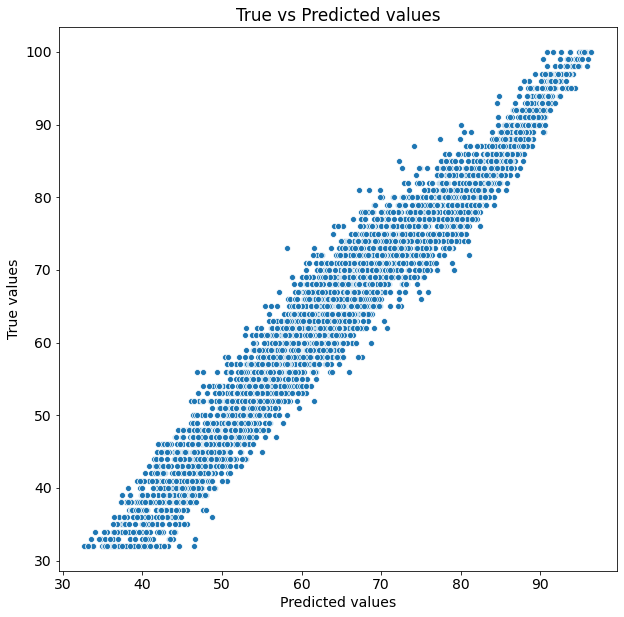

In [407]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.619
MAE:	44484.026
MSE:	3655755686.157
RMSE:	60462.846

R2:	0.561
MAE:	7.767
MSE:	95.142
RMSE:	9.754


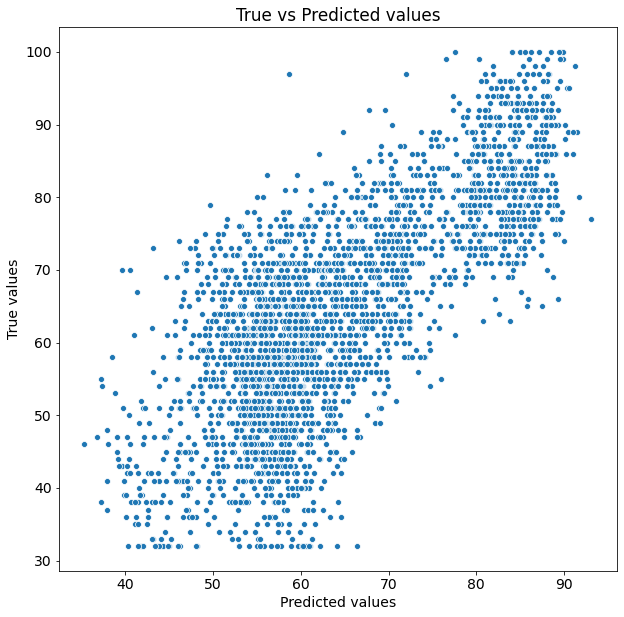

In [408]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

**Обучение и оценка модели**

In [409]:
final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)

RandomForestRegressor()

R2:	0.941
MAE:	2.815
MSE:	12.636
RMSE:	3.555


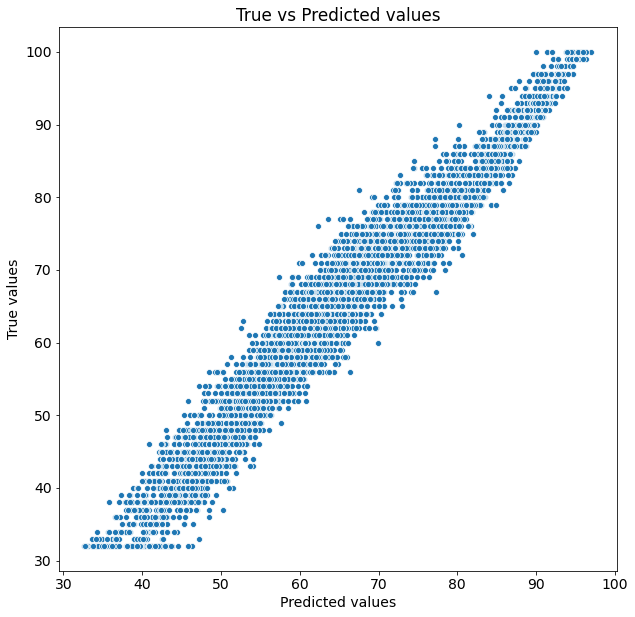

In [410]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.564
MAE:	7.745
MSE:	94.664
RMSE:	9.73


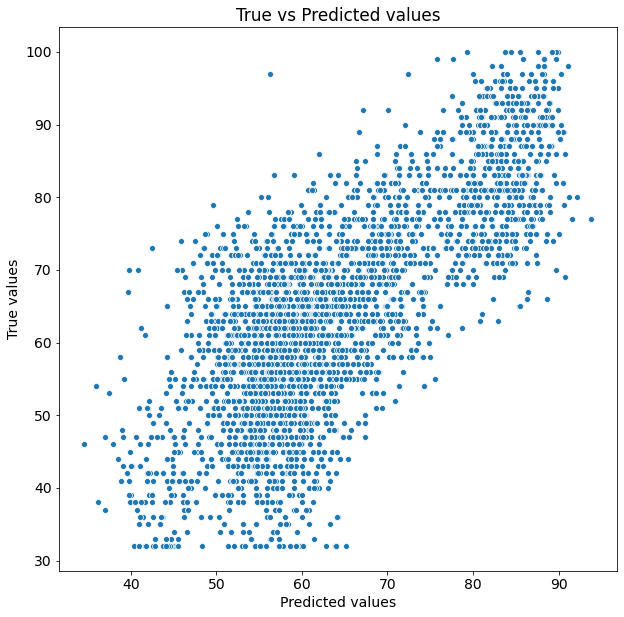

In [411]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Сохранение модели

**Scaler**

In [412]:
SCALER_FILE_PATH

'/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_scaler_3.pkl'

In [413]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [414]:
with open(SCALER_FILE_PATH, "rb") as file:
    new_scaler = pickle.load(file)

**Model**

In [415]:
MODEL_FILE_PATH

'/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_model_3.pkl'

In [416]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [417]:
Test_DATASET_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/Macerszmidt_test_prep.csv'
PREPARED_DATASET_test_PATH = '/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/test.csv'

# output

In [418]:
test = pd.read_csv(PREPARED_DATASET_test_PATH)
test = test[feature_names]
test.head()

,Id,age,years_of_experience,lesson_price,qualification
0,10000,46.0,3.0,1050.0,1.0
1,10001,43.0,3.0,1850.0,2.0
2,10002,52.0,1.0,1550.0,1.0
3,10003,57.0,6.0,2900.0,3.0
4,10004,44.0,4.0,3150.0,3.0


In [419]:
stand_test_features = scaler.fit_transform(test)
test.head()

,Id,age,years_of_experience,lesson_price,qualification
0,10000,46.0,3.0,1050.0,1.0
1,10001,43.0,3.0,1850.0,2.0
2,10002,52.0,1.0,1550.0,1.0
3,10003,57.0,6.0,2900.0,3.0
4,10004,44.0,4.0,3150.0,3.0


In [420]:
test[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [421]:
test.head()

,Id,age,years_of_experience,lesson_price,qualification
0,10000,-0.730774,-1.121140,-0.569875,-0.908202
1,10001,0.263815,1.136037,2.192764,1.616335
2,10002,-0.855098,-1.121140,-0.950929,-0.908202
3,10003,0.015167,1.700332,-0.569875,-0.908202
4,10004,-0.357803,-0.556846,-0.379348,-0.908202


In [422]:
final_preds = final_model.predict(test)
final_preds

array([55.11, 77.82, 59.08, ..., 59.83, 56.46, 56.21])

In [423]:
final_preds.shape

(10000,)

In [424]:
predicted_df = pd.DataFrame(final_preds, test['Id'], columns=['mean_exam_points'])
predicted_df.to_csv('predicted_defaults.csv', index_label= 'Id')

In [425]:
predicted_df.head()

,mean_exam_points
Id,
10000,55.11
10001,77.82
10002,59.08
10003,50.79
10004,49.47


**Сохраняем полученную модель**

In [426]:
predicted_df.to_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/EMacerszmidt_predictions_tosend.csv', index='Id')

In [427]:
f = pd.read_csv('/Users/ekaterina/Desktop/LEARN/IT/Алгоритмы анализа данных/Курсовая/gb-tutors-expected-math-exam-results/EMacerszmidt_predictions_tosend.csv')
f.head()

,Id,mean_exam_points
0,10000,55.11
1,10001,77.82
2,10002,59.08
3,10003,50.79
4,10004,49.47
